# Exploratory Data Analysis: preprocessing, data cleansing, statistical analysis and visualizations

### 1. import the necessary libraries for the analysis

In [1]:
# public libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# own libraries
from evaluation_framework import LogRegModel

### 2. load data files and merge them into one DataFrame

In [2]:
# read college player statistics from 2009 to 2022
# the data can be found in two different csv files, one contains stats from 2009 to 2021
# while the other one contains the latest statistics (2022)
college1 = pd.read_csv('Data\CollegeBasketballPlayers2009-2021.csv',low_memory=False)
college2 = pd.read_csv('Data\CollegeBasketballPlayers2022.csv',low_memory=False)

# the other data source contains draft picks at the nba draft for each year from 2009 to 2021
draft = pd.read_excel('Data\DraftedPlayers2009-2021.xlsx')

# first of all, lets concatenate the college statistical dataframes
college = pd.concat([college1,college2])
print(college1.size+college2.size == college.size)

# since the draft data set has merged cells in the table header the first row must be dropped
draft.drop(0,axis=0,inplace=True)

# rename the ROUND.1 column to PICK, and modify the PLAYER to player_name 
# so it can be act as a key during the join with the college data set
draft.rename(
    columns={
        "PLAYER": "player_name", 
        "TEAM": "drafted_by", 
        "YEAR" : "year", 
        "ROUND" : "draft_round", 
        "ROUND.1" : "draft_pick"},
        inplace=True)

# also lower all column names
draft.columns = draft.columns.str.lower()

# join (merge) the college set with the draft data to identify those players who have been drafted after playing in college
df = pd.merge(college,draft,how='left',on=['player_name','year'])

True


### 3. clean the data set and prepare it for statistical analyzis and further analytical steps

In [3]:
# create a new column to identify the drafted players
df['drafted_flag'] = (~df.overall.isnull())*1
df.drafted_flag.value_counts()

0    64437
1      602
Name: drafted_flag, dtype: int64

In [4]:
# check non integer columns and encode the categorical values 
df.select_dtypes(include=['int64','float']).head()

#[df.dtypes == 'int64' or df.dtypes == 'float']
# X = df[:][1:-5]
# X

#[df.count() == 65039]

# Unnamed: 64
# print(
#     df['yr'].unique(),
#     len(df['yr'].unique()),
#     df['yr'].value_counts(),
#     sep='\n'
# )
# pd.set_option('display.max_rows', None)
# print(df['team'][df.year==2021].value_counts())

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,6.22026
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,3.94375
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,10.92680
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,6.77427
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.00000


### 4. create visualizations for statistical analysis

In [5]:
df.describe()


,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65,drafted_flag
count,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,65039.000000,...,64803.000000,64812.000000,64812.000000,64812.000000,64812.000000,64812.000000,64812.000000,64812.000000,64803.000000,65039.000000
mean,22.420040,37.067383,91.645142,18.110063,44.515657,47.581846,5.527373,12.731035,10.775724,20.131596,...,-0.445792,0.762107,1.903302,2.665409,1.073280,0.530115,0.279977,5.780418,5.404008,0.009256
std,10.162278,28.024319,31.159993,6.269538,18.542046,17.747817,9.178012,10.648824,9.340585,12.324294,...,3.357477,0.732074,1.484799,2.094230,1.167788,0.469757,0.412756,4.935257,5.586708,0.095762
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,9.200000,83.900000,14.500000,40.000000,43.800000,1.700000,8.400000,4.600000,14.600000,...,-1.735315,0.222200,0.708300,1.000000,0.225800,0.160000,0.000000,1.590900,0.340783,0.000000
50%,26.000000,35.600000,97.100000,18.100000,47.800000,50.870000,4.300000,11.900000,9.000000,19.000000,...,-0.318568,0.538500,1.645200,2.269200,0.678600,0.428600,0.133300,4.500000,4.651990,0.000000
75%,30.000000,61.900000,106.900000,21.800000,53.300000,56.160000,8.100000,16.100000,15.000000,24.400000,...,1.064800,1.100000,2.777800,3.833300,1.533300,0.794100,0.363600,9.066700,8.509500,0.000000
max,41.000000,98.000000,834.000000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,...,78.985500,5.933300,11.545500,15.000000,10.000000,4.000000,5.258100,30.090900,127.274000,1.000000


In [6]:
df.pick.value_counts()

46.0    35
38.0    34
58.0    33
49.0    33
33.0    32
51.0    32
56.0    32
36.0    31
59.0    31
34.0    30
26.0    29
48.0    29
41.0    29
42.0    29
45.0    28
55.0    28
50.0    28
21.0    28
11.0    28
53.0    28
30.0    27
44.0    27
40.0    26
54.0    26
27.0    26
22.0    26
35.0    25
32.0    25
52.0    25
25.0    24
9.0     24
14.0    24
47.0    24
28.0    24
24.0    23
13.0    23
60.0    23
17.0    23
19.0    22
10.0    22
37.0    22
12.0    21
6.0     21
20.0    21
43.0    20
15.0    20
18.0    19
39.0    19
8.0     18
23.0    18
2.0     17
29.0    17
5.0     15
57.0    15
4.0     14
16.0    14
31.0    13
1.0     13
3.0     11
7.0     11
Name: pick, dtype: int64

<AxesSubplot: >

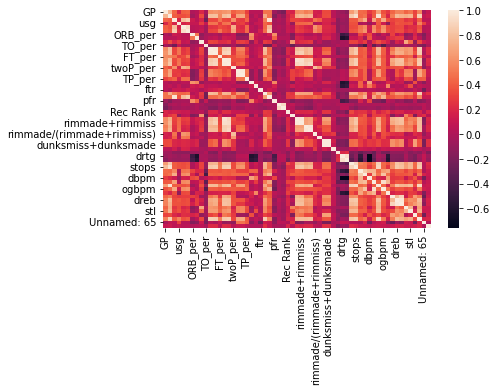

In [7]:
sns.heatmap(df.corr(),annot=False)

<AxesSubplot: xlabel='drafted_flag', ylabel='Count'>

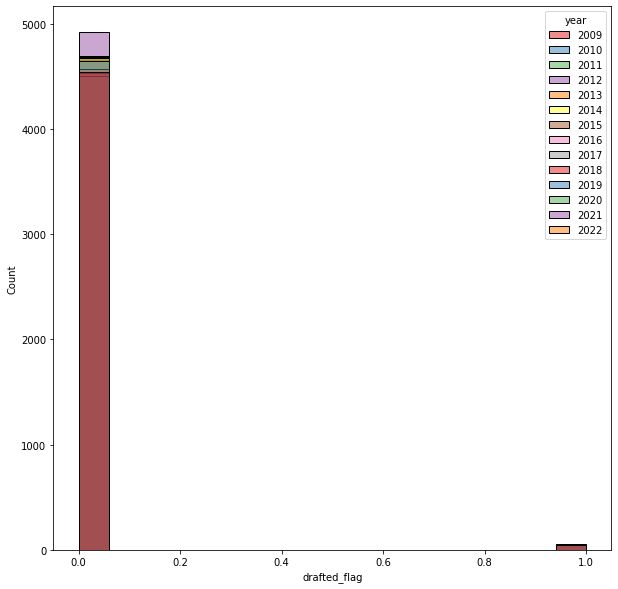

In [31]:
# sns.histplot(df, x='drafted_flag', bins=2,stat='count')
palette = sns.color_palette("Set3", 20)
palette

sns.histplot(data=df, x="drafted_flag", hue="year",palette="Set1")

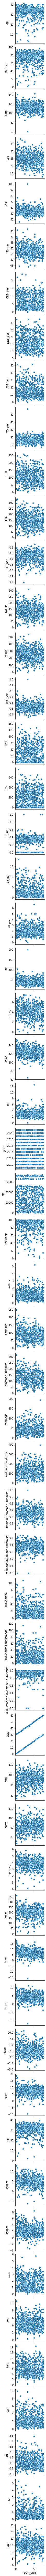

In [9]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df, x_vars='draft_pick',y_vars=df.select_dtypes(include=['int64','float']).iloc[:,:-1],diag_kind = 'kde')